# Day 2: Algorithm Complexity, Execution Time, & Spatial Complexity 🚀

## Table of Contents 📖

- [Objectives](#objectives)
- [Algorithm Complexity](#algorithm-complexity)
  - [Asymptotic Notation and Growth Rates](#asymptotic-notation-and-growth-rates)
  - [Big O Notation in Practice](#big-o-notation-in-practice)
  - [Key Point](#key-point)
  - [Real-World Examples & Quiz Questions](#real-world-examples-quiz-questions)
    - [Example 1: Cupboard Notebook Run](#example-1-cupboard-notebook-run)
    - [Example 2: Elevator Meetings](#example-2-elevator-meetings)
    - [Example 3: Brute Force Conversion](#example-3-brute-force-conversion)
    - [Example 4: Simple Python Programme Complexity](#example-4-simple-python-programme-complexity)
    - [Example 5: Clothes Selection](#example-5-clothes-selection)
    - [Example 6: Binary Search](#example-6-binary-search)
  - [Comparing Complexities](#comparing-complexities)
  - [Key Takeaways](#key-takeaways)
- [Estimating Execution Time](#estimating-execution-time)
  - [Measuring with the `time` Module](#measuring-with-the-time-module)
  - [Using the `timeit` Module](#using-the-timeit-module)
  - [Practical Benchmarking Considerations](#practical-benchmarking-considerations)
  - [Profiling: Beyond Timeit](#profiling-beyond-timeit)
- [Spatial Complexity](#spatial-complexity)
  - [Memory Usage and Trade-Offs](#memory-usage-and-trade-offs)
  - [Detailed Example: DNA Sequence Analysis](#detailed-example-dna-sequence-analysis)
  - [Comparing Data Structures](#comparing-data-structures)
- [Solving Algorithmic Problems](#solving-algorithmic-problems)
  - [A Systematic Approach to Problem Solving](#a-systematic-approach-to-problem-solving)
  - [Tips, Strategies, and Common Pitfalls](#tips-strategies-and-common-pitfalls)
- [Input/Output Optimisation](#inputoutput-optimisation)
  - [Reading and Writing Files](#reading-and-writing-files)
  - [Optimising Input/Output Operations](#optimising-inputoutput-operations)
- [Reflection Questions](#reflection-questions)
- [Additional Resources](#additional-resources)

## Objectives

- **Master Asymptotic Analysis:** Deepen your understanding of how algorithm efficiency is measured, and explore Big O, Θ (Theta), and Ω (Omega) notations. 🤓
- **Compare Growth Rates:** Learn to contrast different complexities (O(1), O(n), O(n²), O(2^n), O(n³)) through concrete examples and visualisations. 📈
- **Measure Execution Time:** Acquire practical skills using Python’s `time` and `timeit` modules, and understand profiling for performance optimisation. ⏱️
- **Analyse Spatial Complexity:** Understand memory consumption, evaluate trade-offs between time and space, and learn strategies for memory optimisation. 💾
- **Develop Problem-Solving Strategies:** Adopt a systematic approach to designing, testing, and refining algorithmic solutions while avoiding common pitfalls. 🔍

## Algorithm Complexity

### 1. Asymptotic Notation and Growth Rates 📈



From the previous lessons, you’ve learned that different algorithms can have different running times. You might wonder why we need to know this. After all, “everyone calculates algorithm complexity” might sound like just another topic from the realm of abstract and convoluted programming stuff. But don’t jump to conclusions! Repeat this mantra a few times to absorb its essence:

```
O(n) — linear dependence
O(log n) — logarithmic dependence
```

Look closely—the meaning becomes clear: it’s about how the algorithm’s running time changes as the input size grows, and whether it can handle that growth at all. In theory, this is called asymptotics and is written as `O(n)` (read as “big O of n”). Sometimes people say **Big O notation**.

When you design an algorithm, knowing how its running time scales is essential—especially if `n` becomes very large. 😊

### 2. Big O Notation in Practice 🤔



Such abbreviations are referred to as **O-notation** (from the English “Big O notation”).

In **O-notation**, we do not account for constants and coefficients. For instance, if an algorithm performs $5 \times n + 3$ operations, its complexity is $O(n)$. In asymptotic analysis, constant values become negligible as $n$ grows. We cannot say that constants are entirely unimportant—after all, in practical scenarios, they can affect performance for smaller inputs. However, they **do not** fundamentally alter whether the algorithm remains feasible for large $n$.

To illustrate, consider the running times of several algorithms:

1. **First algorithm:** performs $2n + 3$ operations.  
2. **Second algorithm:** performs $3n$ operations.  
3. **Third algorithm:** performs $\log(n+2)$ operations.  
4. **Fourth algorithm:** performs $\log(n+1)+1$ operations.

If you plot the number of operations against $n$, you will see that, as $n$ becomes very large, these expressions differ only by their constant factors or linear coefficients—yet they all grow **linearly** with $n$. In Big O notation, each one is described as $O(n)$.

### 3. Key Point 🧠



Although constants and lower-order terms can matter for small inputs, they **cannot** transform a linear algorithm into a quadratic or exponential one, and vice versa. That is why Big O notation focuses on the **dominant term** as $n$ tends to infinity, giving us a clear picture of how an algorithm’s complexity scales in the long run.

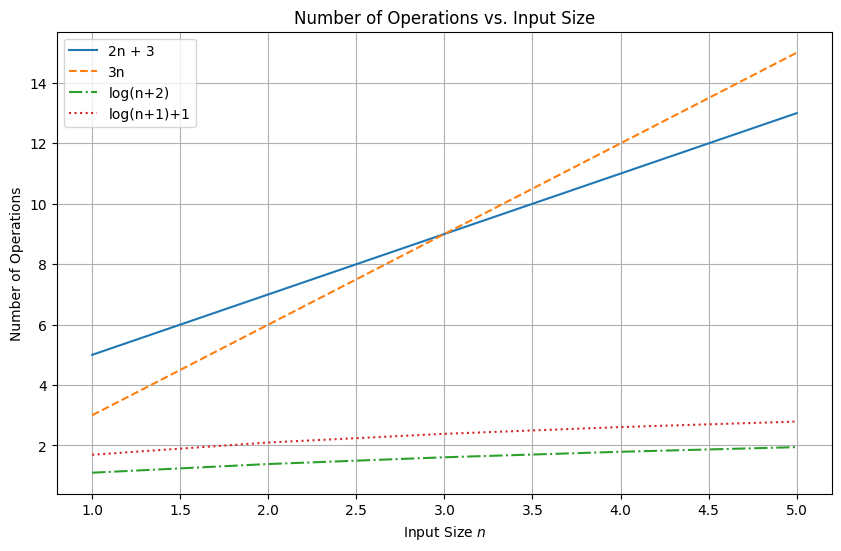

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of input sizes
n = np.linspace(1, 5, 5)

# Define several example functions
f1 = 2*n + 3           # First algorithm: 2n + 3
f2 = 3*n               # Second algorithm: 3n
f3 = np.log(n + 2)     # Third algorithm: log(n+2)
f4 = np.log(n + 1) + 1 # Fourth algorithm: log(n+1) + 1

plt.figure(figsize=(10, 6))
plt.plot(n, f1, label='2n + 3', linestyle='-')
plt.plot(n, f2, label='3n', linestyle='--')
plt.plot(n, f3, label='log(n+2)', linestyle='-.')
plt.plot(n, f4, label='log(n+1)+1', linestyle=':')
plt.xlabel('Input Size $n$')
plt.ylabel('Number of Operations')
plt.title('Number of Operations vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()

The first and second algorithms are similar to each other, just as the third and fourth algorithms resemble one another. However, the first two differ significantly from the last two. This happens because, for large $n$, the **type** of dependence (i.e., linear, logarithmic, quadratic, etc.) is more important than any specific coefficients or additional terms. That is why, in Big O notation, we focus solely on the **form** of the dependence.

Aside from linear and logarithmic complexity, you will often encounter other common forms when analysing an algorithm’s running time:

- **Quadratic dependence** — $O(n^2)$  
- **Cubic dependence** — $O(n^3)$  
- **Exponential dependence** — $O(2^n)$  
- **Factorial dependence** — $O(n!)$

Sometimes, an algorithm’s running time does not depend on the size of the input data at all; in other words, it always performs a fixed number of operations. In Big O notation, we call this **$O(1)$**, or **constant time**.

### 4. Additional Notations: Θ and Ω 🤓



- **Θ (Theta) Notation:** Represents a tight bound on the algorithm's running time. If an algorithm’s runtime is Θ(f(n)), its growth rate is exactly f(n) for large n.
- **Ω (Omega) Notation:** Provides a lower bound on the runtime. If an algorithm is Ω(f(n)), it takes at least f(n) time to run.

These notations help further refine the analysis by distinguishing between best-case, average-case, and worst-case scenarios. 🤓

### 5. Real-World Examples & Quiz Questions 🧐

#### **Example 1: Cupboard Notebook Run 📚** 

In the hospital George usually visits, there is Dr James Thompson on duty. He is not especially sociable, spending all his time in his office, with the door only slightly ajar.

We need to determine how many times per day the door to Dr Thompson's office is opened, under the assumption that each patient enters, leaves, and closes the door behind them:

- Each visitor opens the door twice: once upon entering and once upon leaving.  
- If there are $n$ visitors, then naively you might think the door is opened $2n$ times.  
- However, because the door was already ajar at the start of the day, the very first opening does not require a "full" door-opening motion. Thus, the total number of **complete** openings is $2n - 1$.

Since $(2n - 1)$ grows in direct proportion to $n$, we say the number of door openings is **$O(n)$**. The important point is that subtracting a constant (in this case, 1) does not alter the fundamental growth rate of the function.

#### **Example 2: Elevator Meetings** 🏢



In a camp, there was a rumor that Tim shook hands three times with his father and even gave him a soda by hand. Later, he greeted everyone in the ward (20 times, never repeating himself) and challenged the idea of “squaring.”

Suppose there are $n$ people in total. Each person greets every other person exactly once, resulting in $(n - 1)$ handshakes per person. Since a handshake between A and B is the same as between B and A, the total number is given by:

$$\frac{n(n - 1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$

For large $n$, this behaves like $n^2$ (ignoring lower-order terms and constants), i.e. $O(n^2)$. 

Pay attention to the fact that the number of handshakes grows quadratically with the number of people. This is a common pattern in problems involving pairs of elements, such as comparing all pairs of elements in a list.

We can get rid of the fraction by multiplying the result by 2, which does not change the growth rate. This is a common trick in Big O analysis. It happens because the fraction is a constant factor, and Big O notation ignores constants.
💡

#### **Example 3: Brute Force Conversion (Decimal to Binary)** 🧮



Suppose we need to iterate through all binary strings of length $n$. For $n = 3$, the strings are: 000, 001, 010, 011, 100, 101, 110, and 111.



##### Quiz Question:


> Which time complexity does this exhaustive search have?
> 
> - $O(N^2)$
> - $O(2^N)$
> - $O(N^3)$
> - $O(\log N)$
> 


The **correct answer** is **$O(2^N)$** because exponential complexity is only practical for very small $N$. 🔥

#### **Example 4: Simple Python Programme Complexity** 🐍


> You receive a single integer $n$ as input and need to compute $42 \times n + 15$. Consider this Python programme:
> 
> ```python
> n = int(input())
> print(42 * n + 15)
> ```
> 
> What is the computational complexity of this programme?
> 
> - $O(n)$
> - $O(1)$
> - $O(\log n)$
> - $O(n^2)$
> 

The **correct answer** is **$O(1)$** because it performs a fixed number of operations regardless of $n$.

#### **Example 5: Clothes Selection** 👗


> Every day, **George** decides what to wear by running a programme on his computer. The algorithm goes through all combinations of **trousers** and **T-shirts**, shows each combination to George, and asks him to rate it on a scale of 1 to 10. After that, the programme reviews all these ratings, selects the highest-rated outfit, and tells George what to wear.
> 
> George has $n$ pairs of trousers and $m$ T-shirts. What is the complexity of the algorithm?
> 
> - $O(n)$  
> - $O(m)$  
> - $O(n^2)$  
> - $O(m^2)$  
> - **$O(nm)$**  
> - $O(n + m)$

The **correct answer** is **$O(nm)$** because the algorithm must consider all possible combinations of trousers and T-shirts. 🤔

#### **Example 6: Binary Search** 🔍



> **Alice** wrote an algorithm to find a particular bottle among $n$ shops. The shops are recorded in alphabetical order, and her algorithm uses **binary search**. What is the complexity of her algorithm?
> 
> - $O(n)$
> - $O(n^2)$
> - $O(\log n)$
> - $O(1)$
> 

Since binary search halves the search space with each step, its running time grows **logarithmically**: $O(\log n)$. 🔍

#### **Comparing Complexities** 📊



George initially thought Alice’s algorithm was $O(n^2)$. However, **Timothy** argued that since $\log n$ grows much more slowly than $n^2$, the binary search is far more efficient.

In fact, if binary search is used correctly, its complexity is $O(\log n)$, which is significantly better than $O(n^2)$. 👍

#### **Key Takeaways 🚀**



1. **Exponential Complexity ($O(2^n)$)**: Practical only for very small $n$. 🚫
2. **Constant Complexity ($O(1)$)**: The work remains unchanged regardless of $n$. 🔒
3. **Logarithmic Complexity ($O(\log n)$)**: Efficiently halves the problem size (e.g., binary search). ⚡
4. **Polynomial Complexities ($O(n), O(n^2), O(n^3)$, etc.)**: Manageable in many cases, but may become heavy as $n$ increases. 📊

## Estimating Execution Time

In previous part, we explored how an algorithm’s running time behaves as the size of the input data grows. You now know that an $O(n)$ algorithm typically runs around three times faster than an $O(n^2)$ algorithm, for large $n$. But how can you tell if it’s sufficiently efficient for your specific task—or whether it will remain efficient enough in practice?


### 1. Practical Testing 🧪

One way to assess any algorithm is to **test it repeatedly** with various values of $n$, to see at which point the programme starts taking too long to finish. This gives you a sense of where the boundary lies between acceptable performance and lengthy waiting times.

Here, the running time is $O(n)$, where $n = \text{visitor}$. However, is this algorithm viable for a **very large** number of visitors?

In essence, the code prints the list twice. If we have a huge number of visitors, the algorithm will print $2n$ times. Although that is still $O(n)$ in asymptotic terms, it could take a considerable amount of time in practice. And when $n$ becomes **enormous**, while memory or processing resources are limited, it becomes a serious concern.


### 2. Measuring Real Execution Time 🕰️

You can also measure the **actual** running time, for example, using `time.time()` or `time.perf_counter()` in Python. This gives you specific figures for how many seconds it took to run that segment of code. Such data helps you determine whether, for instance, two seconds is acceptable, but ten seconds might be too long. Let's implement this:

In [ ]:
import time

start_time = time.time()

visitor = 1000
a = []

for i in range(visitor):
    a.append(i)

print("  %s seconds  " % (time.time() - start_time))

--- 7.605552673339844e-05 seconds ---


In [ ]:
import time

start_time = time.perf_counter()

visitor = 1000
a = []

for i in range(visitor):
    a.append(i)

print("  %s seconds  " % (time.perf_counter() - start_time))

--- 7.012503920122981e-05 seconds ---


#### Using the `timeit` Module 🕰️


Another way to measure execution time is with the `timeit` module. This module provides a simple interface for measuring the time taken by small code snippets. Here’s an example:


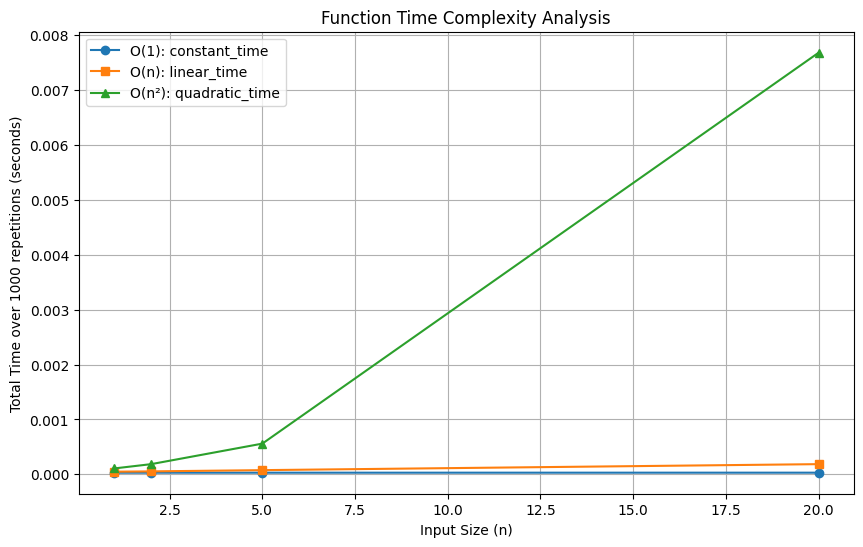

In [3]:
import timeit
import matplotlib.pyplot as plt

# Define three functions with different time complexities

# O(1) - Constant time: simply returns the first element of the list.
def constant_time(lst):
    return lst[0]

# O(n) - Linear time: sums all elements in the list.
def linear_time(lst):
    total = 0
    for x in lst:
        total += x
    return total

# O(n^2) - Quadratic time: computes a sum over all pairs of elements in the list.
def quadratic_time(lst):
    total = 0
    n = len(lst)
    for i in range(n):
        for j in range(n):
            total += lst[i] * lst[j]
    return total

# Define a range of input sizes
input_sizes = [1, 2, 5, 20]
# Number of repetitions to get a measurable time
repetitions = 1000

# Containers to store the timing results
times_constant = []
times_linear = []
times_quadratic = []

# Measure time for each function and input size
for size in input_sizes:
    # Generate a sample list of a given size
    lst = list(range(size))
    
    # Use lambda functions to "freeze" the current list as an argument for each function
    timer_constant = timeit.Timer(lambda: constant_time(lst))
    timer_linear = timeit.Timer(lambda: linear_time(lst))
    timer_quadratic = timeit.Timer(lambda: quadratic_time(lst))
    
    # Time the execution for a number of repetitions
    t_const = timer_constant.timeit(number=repetitions)
    t_linear = timer_linear.timeit(number=repetitions)
    t_quad = timer_quadratic.timeit(number=repetitions)
    
    times_constant.append(t_const)
    times_linear.append(t_linear)
    times_quadratic.append(t_quad)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_constant, label='O(1): constant_time', marker='o')
plt.plot(input_sizes, times_linear, label='O(n): linear_time', marker='s')
plt.plot(input_sizes, times_quadratic, label='O(n²): quadratic_time', marker='^')
plt.xlabel('Input Size (n)')
plt.ylabel('Total Time over {} repetitions (seconds)'.format(repetitions))
plt.title('Function Time Complexity Analysis')
plt.legend()
plt.grid(True)
plt.show()


### 3. Balancing Theory and Practice 🤹‍♂️


In this lesson, we will learn to balance the **theoretical** assessment using Big O notation with **practical testing** on real data. It is not a matter of one being more important than the other. We need to evaluate both aspects: some issues can be solved by optimising the algorithm itself, while others may require changing our overall approach or selecting a different method entirely.

#### Is This $O(n)$ Approach Feasible in Practice? 🤔


We have established that the algorithm’s complexity is $O(n)$, where $n$ is the number of journeys. But can we realistically apply this method?

First, we need to consider the **scale** of $n$. For example, imagine a city of ten million inhabitants, each making two journeys per day over the course of a month. That gives us $600$ million journeys in a single month. We might round this up to **one billion** to account for additional trips by tourists or other factors.

Now we need to estimate how **quickly** a modern computer can handle these operations. Suppose a current processor can perform roughly one billion operations per second. If we assume each journey corresponds to **one operation**, then one billion journeys would take about one second—if everything were executed sequentially without any other overhead. On a $2.5$ GHz processor, in theory, that could be $2.5$ billion operations per second.

We can express this as:
$$
t = \frac{n}{\text{frequency}}
$$
If $n = 1{,}000{,}000{,}000$ (one billion) and the frequency is $2.5 \times 10^9$ operations per second, the calculation suggests:
$$
t = \frac{1{,}000{,}000{,}000}{2.5 \times 10^9} = 0.4 \text{ seconds.}
$$

In principle, **0.4 seconds** might sound acceptable. However, in real scenarios, there are always additional considerations such as scheduling, resource sharing with other processes, memory constraints, and so on. As a result, the actual running time could be noticeably longer.

Whether 0.4 seconds is too slow or perfectly fine depends on the **specific requirements** of the task. In some applications, half a second is negligible, while in others, it might be considered unacceptably slow. That is why we must balance **theoretical** complexity with the **practical** realities of system performance and workload.

Here we can see that the **theoretical** complexity of an algorithm is only one part of the story. The **practical** side is equally important, as it determines whether the algorithm can be applied in real-world scenarios.

> **[George]:**  Is it really possible to account for a single journey in just one processor tick?  
> 
> **[Timothy]:**  I’m glad you’ve pointed that out. Indeed, a single tick isn’t enough. Processor instructions are the most basic operations, but even they are more complex than they appear. For instance, you need to access memory; if the data doesn’t fit in RAM, you’ll have to fetch it from the hard drive or even from the network. And all this is just to handle one single step in the process.
> 
> **[George]:** So, what steps does the programme actually have to perform to handle just one journey?
> 
> **[Timothy]:**
> The programme needs to:  
> 1. Read how many passengers are on board.  
> 2. Record who got on.  
> 3. Record who got off.  
> 4. Check if each passenger has paid.  
> 5. Keep track of the total fare.  
> 6. Update its data structure.  
> 7. Possibly carry out other checks as well.
>   
> **[George]:** So it seems we were off by a factor of ten in our time estimate. Instead of 0.4 seconds, it might actually take 4 seconds—or even longer.
>   
> **[Timothy]:** Exactly. The actual processing speed depends on many factors.

The number of instructions in a programme can vary slightly depending on the processor used or the compiler’s optimisations. Some instructions may take multiple ticks, while others—especially arithmetic operations—can be handled in fractions of a tick.

It follows that if we wanted to ignore constants in our time-complexity analysis, we couldn’t entirely do so in practice: there are too many nuances in how instructions are actually executed. However, this is precisely why we use **Big O notation**—it offers a high-level view of the algorithm’s growth rate, leaving out the smaller details.

### 4. Measuring Actual Performance 📏


To see how our rough estimates hold up in reality, we can measure how long it takes to run a simple loop in **Python**, as in the following code:

#### Python Example

In [4]:
import time

time_start = time.time()
i = 0
while i < 1000000000:  # 1 billion iterations
    # do nothing
    i += 1
time_span = time.time() - time_start
print(time_span, "seconds")

25.54009509086609 seconds


#### C++ Example

```cpp
#include <iostream>
#include <chrono>

int main() {
    auto start = std::chrono::high_resolution_clock::now();
    long long i = 0;
    while (i < 1000000000LL) {
        i++;
    }
    auto finish = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> time_span = finish - start;
    std::cout << time_span.count() << " seconds\n";
    return 0;
}
```


Each iteration of the loop involves three steps: 
- incrementing a counter,  
- checking the condition, 
- and jumping back to the start of the loop. 

Multiplying those three actions by a billion iterations gives you around three billion operations, which might theoretically take about **1.2 seconds**. 

 A C++ programme can indeed run at roughly that speed, although in reality it might be faster or slower. Timothy points out that Python may run about **150 times more slowly**, owing to additional overhead. If you understand lower-level details, you know that `i++` in Python eventually generates several instructions, plus condition checks, array-boundary checks, loop management, and so on.

Any performance estimate is rough, so it is wise to build in a **margin of safety**. Yes, a billion iterations might take around one second—or less—in C++, whereas in Python it could take minutes. In practice, performance also depends on the operating system, how many other processes are running, and the processor’s workload. Moreover, C++ and Go typically achieve tighter performance than Java, which in turn tends to be tighter than Python or Node.js.

When deciding on an approach to solve a particular problem, you need to **evaluate** how long it will take for your input size and **choose** a suitable method. That choice might range from using straightforward algorithms to devising more advanced solutions.

Ultimately, it is best to understand the **theory** and then **test** your code in practice. In the tasks ahead, you will need to determine whether your algorithm can complete within the specified constraints.

Thus, although theory provides a **rough** estimate, practical measurements are essential for determining how code will truly perform in a given language and environment.

#### **Exercise 1: Apple Selection** 🍏




George has gone to buy apples for **Ally** and **Rita**. On the shop counter, there are $N$ apples ($2 \le N \le 10{,}000$). To avoid offending anyone, he decides to purchase two apples whose weights differ by the smallest possible amount. George’s idea is to check **every pair** of apples and record the pair if it offers a smaller weight difference than the previous best choice.

> **Question**: How long would this algorithm take to run in Python? Select the option that best matches the likely runtime.
> 
> - $0.01$ seconds
> - $0.1$ seconds
> - $1$ second
> - $20$ seconds
> - $1000$ seconds

This is not the most efficient algorithm, and it has **quadratic** complexity. For $N = 10^4$, the number of comparisons is:

$$
\frac{N \times (N - 1)}{2} \;=\; \frac{10^4 \times (10^4 - 1)}{2} \;\approx\; 5 \times 10^7 \text{ iterations.}
$$

Suppose each iteration involves around ten operations. If each operation takes about **100 processor ticks** in Python, then each iteration amounts to roughly $10 \times 100 = 1000$ ticks. With a processor speed of $2.5 \times 10^9$ ticks per second, this corresponds to approximately **20 seconds** of computation time in an ideal scenario.

It is important to note that this is a **rough** estimate. The actual performance could vary significantly—perhaps the algorithm might take only 2 seconds or it could take 4 seconds, 10 seconds, or even 100 seconds. We cannot rule out the possibility that it might finish in **30 seconds** under real conditions, or that it might require over **1000 seconds** if the environment is heavily loaded.

The **correct answer** is **$20$ seconds**. 

#### **Exercise 2: Solar System Model** 🌌


> In the same shop, **George** decided to buy a pair of apples for his model of the Solar System. He needs to find two apples that differ in size by the **maximum** possible amount—one to represent the **Sun** and one for **Pluto**. To do this, George decided to first locate the smallest apple, then the largest. **How long will this search take?**
> 
> - $0.01$ seconds
> - $0.1$ seconds
> - $1$ second
> - $10$ seconds

This task was **much more efficient**. The linear algorithm managed it in **less than one hundredth of a second**. The total number of loop iterations is:
$$
2 \times N = 2 \times 10^4,
$$
where the factor of 2 arises because we are finding both the **minimum** and the **maximum** values. Consequently, the approximate running time is:
$$
\frac{2 \times 10^4 \times 100}{2.5 \times 10^9} = 8 \times 10^{-3} \text{ seconds.}
$$

In other words, it took **roughly 0.008 seconds**.

The **correct answer** is **$0.01$ seconds**.

#### **Exercise 3: Apple Sponge Recipe** 🍰


> George still has some leftover apples, so he decides to bake an apple sponge (sharlotka). This time, he needs to load a book containing **one billion recipes** into the computer and choose the right one. The recipes in the book are sorted in alphabetical order, so George opts to use **binary search**. How long will it take to find the recipe?
> 
> - $10$ microseconds  
> - $0.01$ second 
> - $0.1$ second
> - $1$ second
> - $100$ seconds

In this task, binary search requires only a **small, logarithmic** number of steps, each of which can be executed almost instantly—on the order of **tens of microseconds**. However, we must not forget that the programme first has to **read** this enormous book of recipes in a loop, and that stage can take a **significant** amount of time. Ultimately, the overall speed of the programme is determined by this “bottleneck,” i.e., the slowest part of the process.

The **correct answer** is **$100$ seconds**.

#### Conclusion 🎉


Occasionally, your programmes may contain sections of code that run too slowly 🐌. To detect these, it helps to learn how to measure the execution time ⏱️ of individual parts of your code in your preferred programming language. If a programme is running more slowly than expected, it is often useful to measure the runtime of its main components. By examining the timing results in detail 🔎, you can pinpoint what is causing the slowdown. When necessary, you can also “profile” the programme.

Once you have identified a slow portion of the programme, you can try to **optimise** it 🔧. This typically involves rewriting that section in a different way and **comparing the speeds** ⚡ of the different versions using the same data—a process often referred to as “benchmarking.”

It is important to recognise, however, that **not** every line of code needs to be written with absolute maximum efficiency in mind. For example, if your programme completes its task in **10 milliseconds** ⏲️, and all you are doing is iterating through an array, the difference between a linear search and a binary search may be negligible—both will finish faster than you can blink 😉. In such cases, it makes little sense to invest time in that micro-optimisation when you could be improving **other** parts of the code that are genuinely slowing things down.

Similarly, if your programme consists of two sections—one that consumes **99%** of the total runtime and another that consumes **1%**—even speeding up the smaller section by a factor of **10** will not noticeably reduce the overall execution time. The key takeaway is to **prioritise** optimisation where it will have the greatest impact on your programme’s performance 🚀.


## Space Complexity


When discussing a programme’s efficiency, we can also assess how it utilises various computer resources. One of the most important of these resources is **memory**. In other words, we want to measure the programme’s capacity to store data structures in memory, as well as any additional overhead.


### 1. What Is the Space Complexity of an Algorithm? 🧠



We have already talked about **time complexity**, where we considered how an algorithm’s running time changes as the input grows. However, even the most efficient algorithm can be impractical if it uses an excessive amount of memory. **Space complexity** describes how much memory is required as the input size increases.

It is helpful to distinguish between:
- **Input storage**: For instance, if your algorithm must read a file from disk, that file size is typically considered *given* and not always counted as additional memory usage.  
- **Additional memory usage**: Data structures (arrays, lists, trees, etc.) that the algorithm creates and uses during execution.

If an algorithm’s computational complexity is too high, the user may have to wait a very long time for the programme to finish.Another crucial factor is the amount of random-access memory (RAM). Programmes that do not have enough memory may freeze, disrupt other processes, and in many cases be unable to complete their tasks at all.

<div style="width: 90%; border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: 'Courier New', Courier, monospace;">
  <p style="font-size: 16px; line-height: 1.6;">
    When a program exhausts the available <strong>RAM</strong>, it turns to a <strong>swap file</strong> or <strong>swap partition</strong>—a process derived from “to swap”. 
    This swap area, residing on an external storage device (like a hard disk or SSD), serves as an extension to the system’s memory.
  </p>
  <p style="font-size: 16px; line-height: 1.6;">
    If insufficient RAM is available, data is shuttled from the relatively small but <strong>fast</strong> memory to the <strong>large</strong> but <strong>slow</strong> disk. 
    When necessary, the data is retrieved back into RAM—a process that is inherently <strong>slow</strong> and often leads to noticeable lags or hangs.
  </p>
  <p style="font-size: 16px; line-height: 1.6;">
    In cases where the program is extraordinarily large or when many processes run concurrently, even swapping may fall short. 
    If no new data can be accommodated in either <strong>RAM</strong> or the swap area, the program—or even the entire system—may crash.
  </p>
  <p style="font-size: 16px; line-height: 1.6;">
    In essence, when both <strong>RAM</strong> and swap space are fully utilized, at least one running program is bound to fail.
  </p>
</div>


Each object in a programme occupies some amount of memory, and storing a large number of objects can require significant space. It is important to pay attention to how you allocate arrays, strings, or other containers, because their sizes are often determined by the size of the input data.

**Space complexity** describes how the amount of memory an algorithm needs grows in relation to the size of its input. Just as with **time complexity**, we use **Big O notation** to indicate this growth. When smaller details (constants, lower-order terms) are ignored, we focus on the main term that dominates for large inputs.

For instance, if your programme uses a **fixed** number of variables, we say it has **$O(1)$ space complexity**—that is, constant space usage. However, if the programme reads $n$ items of data and stores them in memory linearly (for example, in an array), it requires **$O(n)$** space.

If the algorithm generates a two-dimensional structure for its $n$ objects—say, a matrix of size $n \times n$—then it will occupy **$O(n^2)$** space, i.e., **quadratic** memory usage.

## Relationship Between Space and Time Complexity 🔄


Every living organism on Earth (from bacteria to humans) is encoded by a set of DNA molecules. Each molecule is a chain made up of four nucleobases—called **adenine (A)**, **thymine (T)**, **guanine (G)**, and **cytosine (C)**:

- **A** (adenine)  
- **T** (thymine)  
- **G** (guanine)  
- **C** (cytosine)

DNA forms a double helix composed of two complementary chains. In this structure, **A** always pairs with **T**, while **G** pairs with **C**. Thanks to this predictable pairing, the double helix can be “unzipped” to read the code and then zipped up again.

Suppose **Alla** and **Rita** have discovered a sample of DNA, represented as a string of letters—something like **“A T G G T A C T G C T T T C G T A C”**—and they wish to analyse it. For example, they might want to identify how many times the sequence **“AGTA”** appears in the DNA, or find which **n**-letter substring occurs most frequently.


### Space and Time Complexity in Practice 🚀



When analysing this DNA sequence, one must consider both **time complexity** (how many operations are needed to process the data) and **space complexity** (how much memory is needed to store and manipulate it). For instance:

- If an algorithm scans each position in the DNA to check for a certain substring, it might require **$O(n)$** time for each scan, leading to a total of **$O(n^2)$** time if it naïvely checks every possible starting position.  
- Storing the DNA sequence in memory typically requires **$O(n)$** space, where $n$ is the length of the sequence. If the algorithm needs additional data structures—say, suffix arrays or hash tables—this space requirement can grow accordingly.

Thus, **Alla** and **Rita** will need an algorithm that efficiently handles both the **time** and **space** aspects of processing these letters. They must consider how the algorithm’s running time scales with the input size, as well as how much memory it requires.

Initially, **Rita** decided on the following method: she introduced a counter and iterated through all the letters in the sequence, increasing the counter whenever she encountered **C** or **G**. In Python, this might look like:

```python
cg_count = 0
sequence = "..."  # some DNA sequence

for position in range(left, right):
    if (sequence[position] == "C") or (sequence[position] == "G"):
        cg_count += 1

print(ccg_count)
```

To count the necessary letters, she spent **$O(n)$** time, where $n$ is the length of the sequence. In terms of **space complexity**, she only needed one counter and a few temporary variables, so the additional memory usage is **$O(1)$**.

Why additional memory usage? Because the counter and temporary variables occupy a fixed amount of memory, regardless of the sequence’s length. This is why we say the space complexity is **$O(1)$**. The amount of memory required by the algorithm does not grow with the input size, it depends only on the algorithm’s structure itself, it is called **additional memory usage**.

However, suppose Rita also wants to **frequently** determine how many **C** or **G** letters appear in various segments of the sequence. Re-running the above loop for each query would repeatedly take $O(n)$ time, which might become costly if she does this many times.  

One way to speed up these repeated queries is to use **prefix sums** (also known as **cumulative sums**). By storing partial counts for each position in an array (requiring **$O(n)$** space), Rita can then answer each query in **$O(1)$** time. This trade-off illustrates how **time** and **space** complexities often interact: using **more memory** can significantly reduce the running time for certain tasks.

After a while, **Rita** got tired of counting the same letters over and over and came up with a new approach.

Instead of counting them directly each time, she stored, at each position, the number of times a given letter (C or G) had appeared **up to** that position. This is known as a **prefix sum** or **cumulative sum**.

For example, consider the sequence:

```
C C A T G A T C
0 1 2 2 3 3 3 3 4
```

To calculate the number of CG-letters in some half-interval, it is enough to subtract from the cumulative sum at the right end (more precisely, at the `right` position) the same sum at the left end. This requires only **$O(1)$** time per query, as opposed to **$O(n)$** if we were to recompute the count each time.

```python
cumulative_sums = [0]
cg_count = 0

for pos in range(len(sequence)):
    if (sequence[pos] == "C") or (sequence[pos] == "G"):
        cg_count += 1
    cumulative_sums.append(cg_count)

print(cumulative_sums[right] - cumulative_sums[left])       
```

Now, Rita can quickly answer questions such as: “How many C/G letters are there between positions **L** and **R**?” She simply computes:

$$
\text{count} = \text{cumulative\_sums}[R] - \text{cumulative\_sums}[L].
$$

This requires **$O(1)$** time per query, whereas computing it on the fly each time would have taken **$O(n)$**. The trade-off is that storing these prefix sums uses **$O(n)$** additional memory. 

In the end, **Rita** spent more time initially (to build the prefix sums) but greatly reduced the time needed to answer repeated queries about how many letters C or G appear in specific segments of the sequence.

The situation considered in the example is typical: we saved auxiliary information to spend less time, that is, we "exchanged" memory for speed. When solving problems, you sometimes have to make a difficult choice: either save more data to reduce the amount of computation; or compute slower, but save memory.

It should be remembered that too much memory consumption can lead to the program crashing with an error. Or its performance will deteriorate due to the use of the swap file.

<div style="width: 50%; border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: 'Courier New', Courier, monospace;">
  <p style="font-size: 16px; line-height: 1.6;">
    In many cases, you do not even need to modify the algorithm itself; you simply need to save the results of <strong>intermediate computations</strong>. 
    This technique is called <strong>caching</strong> (or <strong>memoisation</strong>). In particular, it makes sense to cache any results 
    that take a long time to compute and are used frequently.
  </p>
</div>


## How to Solve Algorithmic Problems. Part 1


To learn how to write efficient algorithmic programmes 🚀, you must learn how to **devise** them 💡. The process of devising code for a task is often referred to as **solving algorithmic problems** 🧩.

We will now look at a few recommendations 👍 that frequently prove helpful when tackling such problems, whether they are **simple exercises** or **serious scientific projects**.

You may sometimes come across this viewpoint: “I’ll read the problem statement, then I’ll look up the canonical solution and memorise it.” Unfortunately, that approach does not really work. In **behavioural economics**, there is a concept known as the **IKEA effect** 🛠️—people value only what they have contributed their own effort towards creating. The same applies to learning: it is better and easier to remember the methods **you** devised, even if it took a great deal of work. The time spent on solving a problem, and the challenges you face along the way, make it easier to spot similar patterns in new tasks later on. The perceived difficulty in the process of problem-solving acts like a **challenge** 🏆, which ultimately strengthens the effect.

There is another common **trap** ⚠️ that developers often fall into:

> You think: “This task is very straightforward; I can definitely solve it.” You write the code… only to discover later that it runs terribly slowly on large inputs, even though it worked fine on small inputs.  
>  
> For instance, if $N = 30$, your code finishes in 0.1 seconds. But if $N = 10{,}000$, it either fails to complete on time or does not run at all. Then you have to urgently switch to a different algorithm, reworking all the logic, and your deadlines have long since passed 😟. Management is unhappy, and you’ve already lost clients. It would have been better to think carefully **from the start** ⏱️.  
>  
> Or the opposite can happen: the developer begins with an **incredibly complex** solution, trying to account for every nuance, optimising it with advanced data structures. This is great for a large team or a major project. However, if you are working **alone** 😓, with a deadline looming in a week, you simply won’t manage it. So you need to understand which optimisations matter and which do not.


There is another trap developers often stumble into 😬:

> “I see it does not look that complicated, so I’ll dive straight into coding.”  
>  
> The next thing you know, a situation arises that many of us recognise: the developer writes code hastily, then realises it contains a bug 🐛. He tries to fix it, but can’t. A new bug appears, which he tries to patch. Before long, the code has turned into a messy Frankenstein creation, littered with fixes upon fixes. Eventually, the developer decides to scrap it and start over 🔄.

Initially, it might have seemed as though 20 minutes of work was enough ⏱️. In reality, four hours were spent. Worse still, the developer is now reluctant to adjust anything because “it might just break again,” despite the code only just starting to work.

If this scenario happened only rarely, it might be no big deal. However, when you neglect the step of **thinking through** the problem before coding, you run the risk of repeating this cycle. It is often far more beneficial to step away from the keyboard ⌨️, perhaps grab a pen and paper ✏️, and outline a clear plan or approach. After all, if you don’t know **what** to code, how can you be sure **why** it’s useful or whether it will even solve the problem?


### A Step-by-Step Approach to Solving Algorithmic Problems 📝


1. **Read the problem statement carefully** 🔍: 
   - Pin down exactly what you need to achieve.  
   - Note any distinctive features of the input data.  
   - Familiarise yourself with the time and memory constraints.  

   Much of the detail in a problem statement is there for a reason. It can hint at the expected input size or the computational challenges. Pay attention to all conditions: sometimes they reveal hidden complexities or edge cases you might otherwise miss.

2. **Plan your solution** 🤔:  
   - Think about how to handle the largest possible input size within the given constraints.  
   - Ask yourself: “How can I process this data? What kind of algorithm is appropriate? What are the typical limits?”  
   - Consider examples: Is it feasible to use a brute-force approach, or will it be too slow? Can you use additional memory to speed things up?  

   If you can devise smaller examples or test cases, do so. By exploring simple scenarios, you can clarify the underlying logic and confirm whether your approach will scale to the more challenging inputs.

3. **Develop and justify your solution** 💡:  
   - Strive for a clear explanation of **why** it works.  
   - Once you have a conceptual method, convert it into code.  
   - Think about whether the algorithm is “naive.” Are there any obvious ways to optimise it?  
   - Examine its complexity: does it run slowly? Does it require a lot of additional memory?  

   Algorithms that look efficient at first can still fail if they have hidden inefficiencies. Before finalising your code, consider whether there is a **more** efficient data structure or a more direct way to solve the problem.

Below is a British English adaptation of the text, preserving the essence about **naive algorithms** and the importance of explaining solutions simply:

At this stage, the ideal outcome is a solution you could **easily** explain to a school student — one without complex definitions or lofty abstractions. 🎓

The algorithm that first comes to mind is often called the **naive** solution. In many cases, it will be **suboptimal**. Nevertheless, do not skip over defining the naive algorithm, even if you know it runs very slowly. Consider specifically **why** the algorithm is inadequate. Is it too slow? Does it require too much extra memory?

By following these steps—**understanding** the problem, **planning** the approach, and **justifying** the solution—you can avoid common pitfalls. This structured method also helps you build a robust mental model, making it easier to spot mistakes and improve your solution before writing any code. 🚀


##### Quiz Question:


In a certain town $N$, bus tickets are issued with numbers ranging from `000000` to `999999`. A **lucky** ticket is defined as one where the sum of the digits in the **even** positions of the number equals the sum of the digits in the **odd** positions. Suppose we come up with an algorithm that, for every ticket number, calculates whether it is lucky. How should we assess this algorithm?

- **This algorithm runs too slowly** and performs unnecessary actions.  
- **This algorithm is inefficient** and uses too much memory for storing temporary variables.
- **This algorithm provides the correct answer** and is efficient in terms of time and memory.



The **correct answer** is the second option: **This algorithm is inefficient and uses too much memory for storing temporary variables.**. If the data is written in the code, the application will be inefficient and will use too much memory. The algorithm can be optimised by calculating the sum of the digits in the odd and even positions of the number without storing the digits themselves. This will make the algorithm more efficient and reduce memory usage.

## How to Solve Algorithmic Problems. Part 2


Sometimes you may not immediately be able to devise an algorithm. In such cases, consider these five tips for approaching the problem:

1. **Assume Helpful Additional Constraints:** 🛟  
    If the problem provides a sequence of arbitrary numbers, try to solve it first for integers only, then extend your solution to real numbers. 😊

2. **Work With Small Input Sizes:** 🐣  
    Begin by solving the problem on a small scale, such as using 3 numbers in the sequence instead of 200. 👍

3. **Decompose the Problem:** 🔍  
    Consider whether you can break the problem into smaller subproblems. For example, given an array of length *n* where you need to find the maximum element, ask yourself:  
    - What happens if you split the array into two equal parts?  
    - If you know the maximum for each half, can you determine the overall maximum?  
    - What if you remove just one element?  
    This approach applies to arrays, numbers, and strings alike—solve the easier case first, then scale up. 🔍

4. **Leverage Known Algorithms and Data Structures:** 📚  
    Reflect on which algorithms or data structures you are familiar with that might be applicable. As you study, maintain a list of topics you’ve covered; your personal notes can be a valuable reference. 📚

5. **Prototype an Initial Solution:** 🛠️  
    Even if you’re not sure it’s correct, write down a potential solution and test it on examples of your own. Analyze the situations where your algorithm might fail and refine it accordingly. 📝

By following these steps, you can gradually build up your understanding of the problem and devise a suitable solution. Remember, the goal is not to solve the problem as quickly as possible, but to **understand** it thoroughly and **develop** a robust solution. 🚀

Let’s continue examining our workflow. In the previous step, we devised an algorithm and described it in simple terms understandable to a school student. Now we will move on to the next stage: **coding** the solution. 💻


- **Evaluate Your Naive Algorithm:** ➕  
   Assess whether its time complexity is acceptable given the constraints, and justify its asymptotic behavior. 🤔

- **Optimize Your Approach!** 🚀  
   Consider how to improve your algorithm with strategies such as: 🚀

   - **Bottleneck Identification:** 
       Look for the slowest part of your program (the bottleneck). For example, if a section runs in quadratic time while everything else is linear, focus on optimizing that segment. 🐢

   - **Eliminating Repetitive Work:**
       If you need to answer the same query for multiple elements (e.g., 10 different array elements), and you know that pre-sorting the array speeds up these queries, it is more efficient to sort just once rather than repeatedly. 🔄

   - **Removing Unnecessary Actions:**  
       Sometimes certain operations, like sorting when finding a minimum value, are redundant. For instance, instead of sorting an array to find its smallest element, maintain a running minimum as you process the input. 🧹

   - **Choosing Optimal Data Structures:**  
       Determine which operations are essential and select data structures that can handle them efficiently. For example, if you frequently check for membership, a set might be more appropriate than an array. 🗃️

   - **Ensuring Full Use of Given Constraints:**  
       Re-read the problem statement to ensure you've utilized all given information. There could be restrictions that allow you to simplify the solution. ✅

   - **Balancing Memory and Time:**  
       Contest problems typically impose limits on both memory and execution time:  
       - Sometimes storing intermediate results (using extra memory) can drastically speed up your algorithm.  
       - In other cases, as with the lucky tickets problem, saving memory may be more important. ⏱️


#### Quiz Question:



Timofey decided to find out whether the four-leaf clover is truly the rarest. He collected `1000` clovers and then decided to count first all the clovers with one leaf, then those with two leaves — and so on up to six leaves. Each time, he compared how many plants had a specific number of leaves and updated his understanding of which clovers are the rarest. Is Timofey’s chosen algorithm a good one?

- **Yes**, Timofey is inventive and does everything correctly.
- **No**, this algorithm takes too long.
- **No**, it requires remembering too much information.



The **correct answer** is the second option: **No, this algorithm takes too long.** Timofey’s approach is inefficient because it requires counting the number of clovers with each possible number of leaves. This method is not optimal, as it involves a large number of operations. A more efficient solution would be to count the number of clovers with each number of leaves in a single pass through the data. This would require less time and memory.

6. **Write Clean Code.** 👩🏼‍💻

Pay attention to variable names. A good variable name describes what the object contains, even if it’s just a loop counter. 📝

Also, mind your function names. Good function names essentially narrate the algorithm you would explain to a fifth-grader. 📚

Often, recipes are written like this:
> - Peel the potatoes and carrots.
> - Cut the potatoes into cubes.
> - Slice the carrots into rounds.
> - Blanch the vegetables.
> - Arrange the vegetables on the plate.

The first three steps are self-explanatory and can be followed without additional instructions. However, if you’re not familiar with cooking, you might need clarification on what **“blanch”** means. In that case, the detailed implementation of a function can serve as that clarification by describing the precise sequence of actions.

On the other hand, if you’re an experienced cook, the recipe is clear with just these five steps and you can skip reading the supporting text. This clarity is achieved through a careful choice of words for the concise recipe. The same principle applies to programming—there should be a way to read a “short recipe” for experts and also review the detailed implementation for the complex parts.

- Extract into functions all actions that repeat and logically form a single part of the work. This approach allows you to test complex sections separately and easier pinpoint where an error is occurring. 🎯
- Remember to adhere to the programming language’s style guidelines. Inconsistent indentation and overly long lines should not distract you or the reviewer from the core idea of the solution.     📏

7. **Carefully review your code. Pay special attention to:**
- Conditional expressions; sometimes you might mix up the `<` and `>` signs or clumsily combine several logical conditions, forgetting the correct order of applying negation, logical `AND`, and `OR` operators. 🤔
- Exit conditions for loops or functions; is the first and last element handled correctly? Are there cases where the loop exits prematurely? 🚪
- Constants; do you clearly remember the purpose of each one? Is the value always consistent? 🧮

8. **Test your code. 🧪**


## How to Test Your Program

In the previous part, we discussed the importance of being able to structure a program using functions. Even if you are writing code only for an educational task, we recommend breaking it down into logical parts.

Code divided into functions is easy to test. To test individual functions, write unit tests.

### 1. Unit Testing 🧪


For example, consider the task of finding palindromes in a set of strings (strings that read the same from left to right as from right to left) and displaying them in alphabetical order. The task is clearly divided into two parts. First, we filter the set of strings to include only those that read the same in both directions. Then we sort the strings in alphabetical order. These steps are independent. In other words, we can check the correctness of each function separately. This helps reduce the likelihood of errors in the program.

> 
> **[Rita]:** After we have divided the program into functions, we need to test two tasks instead of one! It seems we have not made any progress in writing tests!  
> **[Timoty]:** That's right. Let's see how to test the first task.
>

We need to determine whether each string is a palindrome. Let’s identify the cases we need to check:

- **Smallest example:** Check if an empty string reads the same backwards.
- **Positive example:** Use a well-known palindrome. For instance, test the word "racecar". ✅  
- **Negative example:** Choose a string that is not a palindrome. For example, test the word "computer". ❌  
- **Edge-case examples:** Consider whether spaces and punctuation should be taken into account, and whether uppercase and lowercase letters are treated as identical. The phrase "A man, a plan, a canal: Panama!" might or might not be considered a palindrome depending on the task requirements. ⚖️  
- **Extra tests:** It’s always better to write more tests than fewer ones, since unnecessary tests can be removed later. In this task, you could also verify the result for characters that look identical in both the Russian and English alphabets. An example string is "TOТ" (where the first and last characters are Latin, but the middle one could be visually similar in both layouts). ✨  
- **Large-scale example:** Use the text from the first page of the novel "War and Peace" and check if it is a palindrome. This test will demonstrate the program’s performance and memory consumption. In some cases, you might notice the program "pausing"—an indication that the algorithm needs optimization. 🚀

> **[Rita]:** We need to display the list of found palindromes in alphabetical order, but we ended up testing only our palindrome detection algorithm.  
>
> **[Timothy]:** Great that you noticed. Attention to detail is crucial in our work. As homework, test the solution yourself.
> 
> **[Timothy]:** I have prepared a table of interesting cases for different types of input data to make it easier for you to deal with them. Choose the ones you need in each specific case, and don't hesitate to add more when you encounter interesting examples you haven't seen before.
>  

<!DOCTYPE html>
<html>
<head>
    <style>
        body {
            margin: 0;
            padding: 0;
            background: #fafafa;
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Arial, sans-serif;
            color: #333;
        }
        .table-container {
            max-width: 1200px;
            margin: 20px auto;
            overflow: hidden;
            border-radius: 16px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            background: white;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        thead th {
            background: #7FBFB6;
            color: #222;
            padding: 16px;
            font-size: 1.1em;
            text-align: center;  /* Changed alignment from left to center */
            border: none;
        }
        tbody td {
            padding: 16px;
            border: 1px solid #E5E7EB;
            vertical-align: top;
            line-height: 1.5;
        }
        tbody tr:nth-child(even) {
            background: #f9f9f9;
        }
        .bullet-list {
            list-style: none;
            margin: 0;
            padding: 0;
        }
        .bullet-list li {
            position: relative;
            padding-left: 20px;
            margin-bottom: 8px;
        }
        .bullet-list li::before {
            content: "";
            position: absolute;
            left: 0;
            top: 8px;
            width: 8px;
            height: 8px;
            border-radius: 50%;
            background: #7FBFB6;
        }
        .italic {
            font-style: italic;
        }
    </style>
</head>
<body>
    <div class="table-container">
        <table>
            <thead>
                <tr>
                    <th>Type of Test</th>
                    <th>Strings</th>
                    <th>Numbers</th>
                    <th>Data Sets / Arrays</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><strong>Smallest Test</strong></td>
                    <td>An <strong>empty string</strong> or minimal negative/zero-length string as allowed by the problem</td>
                    <td><strong>0</strong> or the minimal/negative integer specified by the problem</td>
                    <td>An <strong>empty data set</strong> (no elements)</td>
                </tr>
                <tr>
                    <td><strong>Largest Test</strong></td>
                    <td>The <strong>longest valid string</strong> permitted by the problem statement</td>
                    <td>
                        A maximum-size number within the allowed range (e.g., 
                        <code>INT_MAX</code>, <code>32767</code>, or <code>65535</code> depending on the constraints)
                    </td>
                    <td>A data set of the <strong>maximum allowed size</strong>, potentially including boundary values</td>
                </tr>
                <tr>
                    <td><strong>Special Cases</strong></td>
                    <td>
                        <ul class="bullet-list">
                            <li>A string with <strong>only spaces</strong> or <strong>non-letter characters</strong></li>
                            <li>A string with <strong>uppercase and lowercase letters</strong></li>
                            <li>A <strong>single character</strong> string</li>
                        </ul>
                    </td>
                    <td>
                        <ul class="bullet-list">
                            <li><strong>Positive/negative</strong> integer</li>
                            <li><strong>Zero</strong></li>
                            <li>A <strong>floating-point</strong> number</li>
                            <li><strong>Sum</strong> or <strong>difference</strong> of two numbers</li>
                        </ul>
                    </td>
                    <td>
                        <ul class="bullet-list">
                            <li>A set where <strong>all elements</strong> are the same</li>
                            <li>A set where <strong>each element</strong> is unique</li>
                            <li>A set containing <strong>edge-case values</strong> (e.g., min/max elements)</li>
                        </ul>
                    </td>
                </tr>
            </tbody>
        </table>
    </div>
</body>
</html>


These are far from all the edge cases that need to be considered. When writing tests, you must think like a hacker. While playing that role, your goal is not to prove that the program is well-written, but rather to show its weaknesses. In other words, try to break your program in every possible way.

### 2. What to Do If the Result Is Not OK 🤔

In the task evaluation system, each solution is executed sequentially on a specific set of tests. For each test, a status is assigned. You can view the statuses of all tests at once. The system may return the following statuses:

- **OK** — The solution worked correctly for this test. 🆗  
- **WA (wrong answer)** — The program produced an incorrect answer. If multiple tests return this verdict, try adding more tests or re-read the requirements; you might have missed an important detail. If only a few tests fail, carefully check edge cases, such as the smallest example input. 🚩  
- **TL (time limit)** — The program did not finish executing within the allotted time. Different languages have different time limits because they have different performance characteristics. If the execution time is very close to the time limit, it indicates that the testing system terminated your code before it could finish. In this case, you need to optimize the algorithm. 🕒  
- **ML (memory limit)** — The program used more memory than allowed. Re-examine the memory constraints for the task. ML often occurs due to the creation of an unnecessary array. It might be possible to process the input one element at a time and output the answer immediately without storing all data. 🧠  
- **RE (runtime error)** — The program terminated with an error that wasn’t handled. You can check the error details in the test's log to see on which line the error occurred and what type of error was caught (for example, attempting to access an 11th element in an array of size 10). 🚨  

A task is considered solved only when all tests return the **OK** status. It is normal for some tasks to require significant effort to fix errors and pass all tests.

## Input-Output

When solving algorithmic problems, many details must be considered since each one can affect the efficiency of the program. You already know that programs can have various constraints. For some applications, the primary limitation is the speed of computations. Such algorithms are known as **CPU-bound** algorithms. For example, in competitive programming tasks, execution time is strictly limited; hence, the solutions must run quickly ⌛️.

In contests, tasks are not only time-constrained but also limited by the available memory. Algorithms that face more issues due to memory shortages than due to processing speed are said to be **memory-bound** algorithms. In such cases, the program may run quickly, but the amount of memory it uses is excessive 🧠.

There is another important aspect of program performance: input/output speed. Some algorithms work so fast and efficiently that most of the time the program simply waits for input data. Sometimes, a program may calculate everything quickly, but then be forced to spend a long time on output. This type of limitation is called **I/O (input/output)-bound** 🔄.

> **[Rita]:** But such programs also take a lot of time, just like CPU-bound programs. Why do we differentiate between CPU-bound and I/O-bound?  
> **[Timoty]:** You're right that in both cases the runtime is the limiting factor. However, in the first case the processor is working hard, while in the second, other components of the system—such as RAM, the hard drive, the internet connection, or even the keyboard—are responsible for the delay.  
> **[Rita]:** So if the hard drive causes the delay, does that mean I need a faster hard drive?  
> **[Timoty]:** If you're loading data from files, a faster hard drive can indeed help. But there are also simpler and more effective ways to accelerate a program—or rather, to prevent it from slowing down. I'll now explain how a program reads data, which will clarify how to organize efficient input and output.

### 1. How a Program Reads Data 📥

The program receives data directly from RAM and processor memory. If it needs data that isn't already loaded, it sends a **request to the operating system**. For example, instead of reading an entire file, the program can request the **next character**. The operating system reads a small block from the hard drive and returns the requested character. 🚀

Since the operating system's response isn't instantaneous, repeated requests (such as asking for each subsequent character) can take a significant amount of time. It's like moving a pile of sand one grain at a time. **Key point:** The OS typically reads data in blocks and uses a buffer, which helps avoid unnecessary and costly disk accesses. 💡

Data **output** also involves the **operating system**. Built-in functions typically **buffer output**, and when the end of the line is reached, the buffer may automatically flush, sending data to the output stream. ⚡️

If you need to print many lines, it's common to combine them into a single string with newline characters and then print them all at once. Remember to always balance **fast output** with **memory usage**, since concatenating too many strings can lead to memory shortages. ⚠️

> **[Rita]:** And when reading data, do memory issues occur?  
> **[Timoty]:** Yes, but they aren’t due to buffering. Imagine that a program must sum all the numbers from a file. What options are there for this?  
> **[Rita]:** The first option is to read the entire line, split it by spaces, convert the substrings to numbers, and sum them, for example:  
> `"2 3 5 7"` → `["2", "3", "5", "7"]` → `[2, 3, 5, 7]` → `17`  
> **[Timoty]:** Exactly. But this method requires a lot of memory because you need to store the original string, the substrings, and the numbers. If the file is large, there might not be enough RAM.  
> **[Rita]:** Is there a way to improve the algorithm?  
> **[Timoty]:** Of course. You can read the data line by line, immediately convert each line to a number, and add it to an accumulator. That way, only the current data is stored in memory, which saves resources.

Even if a program needs to store all the data it reads, it most likely doesn't need the original strings. Therefore, there's no need to retain them. Once you've read the data, process it **once** and store it in the most suitable format for the task. For example, if you're working with numbers, store them as *numbers* rather than strings. **Key Point: Optimize data storage to conserve memory.** 🚀

This approach helps save RAM. Converting a string to a number might seem like a simple operation, but if you don't save the result, you'll have to repeat the conversion every time, which can be very time-consuming. **Key Point: Avoid redundant operations to improve efficiency.** ⏱️

## Input/Output Optimisation


Standard input/output methods are not always efficient, especially when dealing with large amounts of data. Although many online platforms (like LeetCode) provide function signatures and handle input/output behind the scenes, it’s still useful to know how to optimise these operations—particularly if you’re testing your solutions locally or participating in other competitions that do require manual input/output.


### Example Problem 📝


1. You receive an integer $n$ ($n \le 10^6$)—the number of lines you will process.  
2. The next $n$ lines each contain **two** integers.  
3. For each of these $n$ lines, calculate and output the **sum** of those two integers.

**Sample Input** (for local testing):
```
3
1 2
10 20
100 200
```

**Sample Output**:
```
3
30
300
```



When working in an online judge environment that directly calls your function, you usually won’t need to manage standard input/output yourself. **However**, if you test locally (e.g., with `python solution.py < input.txt`) or use a platform that requires explicit input reading, consider the following optimisations.



### Efficient Code Structure 🚀

Below is an illustrative Python solution that reads from standard input and prints the results all at once. You can adapt it for your local testing environment or for a system that expects a `main()` function:

```python
import sys

def solve():
    num_lines = int(sys.stdin.readline().strip())  # Read the first line
    output_numbers = []
    
    for _ in range(num_lines):
        line = sys.stdin.readline().rstrip()
        value_1, value_2 = line.split()
        value_1 = int(value_1)
        value_2 = int(value_2)
        result = value_1 + value_2
        output_numbers.append(str(result))
    
    # Print all results at once
    print('\n'.join(output_numbers))

# For local testing only:
if __name__ == '__main__':
    solve()
```


#### Why This Is Efficient? 🤔


1. **Buffered Output**:  
   Instead of printing each sum immediately, we collect them in `output_numbers` and print them all at once. Printing line by line can be slower, especially for very large $n$.

2. **Local Variables**:  
   By encapsulating everything in the `solve()` function, you use local rather than global variables. This can improve performance in Python.

3. **Fast I/O Methods**:  
   - We use `sys.stdin.readline()` instead of `input()` for faster reads.  
   - We manually strip the newline character with `.rstrip()`.  
   - We split the line into two parts (`value_1`, `value_2`) and convert them to integers without creating extra objects like lists or maps.

4. **Minimal Overhead**:  
   - Constructing temporary lists or using `map(int, line.split())` can be slightly slower in very large inputs due to the creation of additional objects.  
   - By parsing the strings manually, we minimise overhead.

### LeetCode-Style Function


On LeetCode, you typically write a function that accepts parameters (e.g., a list of pairs) and returns a result. For the above problem, you might receive the input as an array of arrays—something like `[[1, 2], [10, 20], [100, 200]]`. A LeetCode-style solution could look like this:

```python
class Solution:
    def pairSums(self, pairs: List[List[int]]) -> List[int]:
        result = []
        for value_1, value_2 in pairs:
            result.append(value_1 + value_2)
        return result
```

LeetCode handles input/output for you, so you only need to focus on the **core logic**. You won’t need `sys.stdin.readline()` or a main function. 👩🏼‍💻

### Additional Tips 📌


1. **Handling Large Data**  
    If you know **n** can be up to **10^6** or more, watch out for **time** and **memory limits**. Even with an **O(n)** approach, you might be dealing with millions of operations, so any micro-optimisations—like reducing extra data structures—can help improve performance. ⚡

2. **Testing Locally**  
    - You can redirect a test file into your Python script for quick performance checks:  
      ```bash
      python solution.py < test_input.txt
      ```  
    - Compare the runtime for different approaches (e.g., `input()` vs `sys.stdin.readline()`). 🔍

3. **Memory vs. Speed**  
    - If you store all results in a list before printing, you might use more **memory** but reduce the overhead from multiple print calls.  
    - If memory is extremely tight, consider printing incrementally—acknowledging that this could be slower. 🐢

4. **Function vs. Full Script**  
    - If a platform like **LeetCode** calls your code, simply implement the **required function signature**.  
    - For judges that require you to handle I/O, adapting the `solve()` approach is recommended. 💻

By following these guidelines—**buffering output**, **using fast I/O methods**, and **encapsulating logic** in a function—you can ensure your code remains efficient, whether you're tackling LeetCode challenges or testing locally with large input files. 🚀

## Complexity Analysis


When analysing the complexity of an algorithm, we consider two main factors: **time complexity** and **space complexity**. These factors help us understand how an algorithm scales with increasing input size and how efficiently it uses memory. We are going to discuss these concepts in detail. 📊

*Note*: Some of the following concepts and algorithms can be challenging. We will observe them now and dive deeper into their intricacies later on, as the main goal at this stage is to learn how to calculate the complexity of certain algorithms. 🚀


### 1. Pseudocode and Cost Table 📝



Let's start by examining the pseudocode for the **Insertion Sort** algorithm. This algorithm is simple and widely used for sorting small arrays. The pseudocode is as follows:

```yaml
Insertion‐Sort(A):

1  for j ← 2 to length[A]                    
2      do key ← A[j]                            
3      // Insert A[j] into the sorted        
4      // subarray A[1..j−1]                 
5      i ← j − 1                             
6      while i > 0 and A[i] > key            
7          do A[i+1] ← A[i]                     
8              i ← i − 1                         
9      A[i+1] ← key
```

Below is a summary of the **cost** (cₖ) for each line and the number of times each line is executed:
| Line | Code                                         | Cost  | Number of Executions                       |
|-----:|:---------------------------------------------|:-----:|:-------------------------------------------|
| 1    | `for j ← 2 to length[A]`                     | c₁    | **n** times                                |
| 2    | `do key ← A[j]`                              | c₂    | **n − 1** times                            |
| 3–4  | (Comment)                                    | 0     | **n − 1** times                            |
| 5    | `i ← j - 1`                                  | c₅    | **n − 1** times                            |
| 6    | `while i > 0 and A[i] > key`                 | c₆    | $\displaystyle \sum_{j=2}^{n} t_j$         |
| 7    | `do A[i+1] ← A[i]`                           | c₇    | $\displaystyle \sum_{j=2}^{n} (t_j - 1)$   |
| 8    | `i ← i − 1`                                  | c₈    | $\displaystyle \sum_{j=2}^{n} (t_j - 1)$   |
| 9    | `A[i+1] ← key`                               | c₉    | **n − 1** times                            |

Here, $t_j$ is the number of times the while loop is executed for a given value of $j$. The total cost of the algorithm is the sum of the costs for each line multiplied by the number of times each line is executed:

$$
T(n) = c_1 \cdot n + c_2 \cdot (n - 1) + c_5 \cdot (n - 1) + c_6 \cdot \sum_{j=2}^{n} t_j + c_7 \cdot \sum_{j=2}^{n} (t_j - 1) + c_8 \cdot \sum_{j=2}^{n} (t_j - 1) + c_9 \cdot (n - 1)

#### Notation and Assumptions:


- **A** is an array of integers.
- **n** = `length[A]`
- $ t_j $ = number of times the `while` loop body executes in the $j$-th iteration of the `for` loop.
- Lines 3–4 are grouped because line 3 is a comment and has no cost.
- The cost of the `while` loop is calculated as the sum of the costs of lines 6–8.
- The cost of the `for` loop is calculated as the sum of the costs of lines 1–9.

### 2. How the Insertion Sort Algorithm Works 🛠️


1. **Outer Loop (Line 1):**  
   Iterate $ j $ from 2 to `length[A]`. The subarray `A[1..j−1]` is considered already sorted; the goal is to insert the element `A[j]` into its correct place within that subarray.

2. **Key Assignment (Line 2):**  
   Store `A[j]` in a temporary variable `key` so that the value is not lost while shifting elements.

3. **Initial Position (Lines 3–4):**  
   Set `i` to `j − 1` to start comparing `key` with the last element of the sorted subarray.

4. **Shifting Elements (Lines 5–7):**  
   While $ i > 0 $ and `A[i] > key`, shift `A[i]` to the right (assign it to `A[i+1]`) and decrement $ i $. In the worst case, if `key` is smaller than all elements in `A[1..j−1]`, each of those $ j − 1 $ elements is shifted.

5. **Placing the Key (Line 8):**  
   Insert `key` at the correct position by setting `A[i+1] ← key`.


### 3. Complexity Analysis of Insertion Sort 📊


- **Worst-Case Scenario:**  
  Occurs when the array is sorted in **descending** order. In this case, every new element is smaller than all previous elements, leading to $ j-1 $ comparisons and shifts for the $ j $-th iteration. The total cost sums up to:
  $$
  1 + 2 + \cdots + (n-1) = \frac{n(n-1)}{2} = O(n^2).
  $$

- **Best-Case Scenario:**  
  Occurs when the array is already sorted in **ascending** order. Each new element is already in the correct position, so the inner loop makes only one comparison per insertion, yielding a total complexity of $ O(n) $.

- **Average Case:**  
  Under a random distribution of inputs, the average complexity is $ O(n^2) $, typically with a smaller constant factor than the worst-case.



## Examples of Asymptotic Complexity


Below are five examples illustrating how to determine an algorithm's time complexity using Big O notation. We will discuss the complexity of each example and provide a brief explanation. 📊

### 1. Linear Traversal $O(n)$ 🚶


**Pseudocode:**

```plaintext
function linearTraversal(array):
    sum = 0
    for i from 0 to array.length - 1:
        sum += array[i]
    return sum
```

- **Analysis:**  
  The loop visits each element exactly once, performing constant work per iteration.
- **Time Complexity:** $ O(n) $.


### 2. Nested Loops (Quadratic) 🔄


**Pseudocode:**

```plaintext
function nestedLoops(n):
    count = 0
    for i from 1 to n:
        for j from 1 to n:
            count += 1
    return count
```

- **Analysis:**  
  The outer loop runs $ n $ times, and for each iteration, the inner loop runs $ n $ times.
- **Time Complexity:** $ O(n^2) $.



### 3. Merge Sort–Like Pattern ($n \log n$) 🔄


**High-Level Pseudocode:**

```plaintext
function mergeSort(array):
    if array has 1 or 0 elements:
        return array
    mid = array.length / 2
    left = mergeSort(array[0..mid-1])
    right = mergeSort(array[mid..end])
    return merge(left, right)
```

- **Analysis:**  
  Dividing the array and merging sorted halves leads to a recurrence relation:  
  $ T(n) = 2T(n/2) + O(n) $.
- **Time Complexity:** $ O(n \log n) $.



 ### 4. Logarithmic Loop ($O(\log n)$) 🔄



**Pseudocode:**

```plaintext
function logarithmicLoop(n):
    count = 0
    i = 1
    while i < n:
        count += 1
        i = i * 2
    return count
```

- **Analysis:**  
  Doubling $ i $ each iteration requires $ \log_2(n) $ steps.
- **Time Complexity:** $ O(\log n) $.



### 5. Exponential Growth (Recursive) 🔄


**Pseudocode:**

```plaintext
function subsets(list):
    if list is empty:
        return [[]]  // return list with one empty subset
    first = list[0]
    restSubsets = subsets(list[1..end])
    newSubsets = []
    for subset in restSubsets:
        newSubsets.add( subset + [first] )
    return restSubsets + newSubsets
```

- **Analysis:**  
  The function computes all subsets of a list.  
  There are $ 2^n $ subsets for a list of size $ n $.
- **Time Complexity:** $ O(2^n) $.


##  Identifying Dominant Terms in Expressions


Below are examples showing how to identify the dominant term, which determines the Big O complexity. We will discuss the complexity of each example and provide a brief explanation. 📊


### 1. Polynomial Example 📊




$$
f(n) = 2n^3 + 3n^2 + 5n + 8
$$

- **Dominant Term:** $ n^3 $  
- **Time Complexity:** $ O(n^3) $



### 2. Another Polynomial Example 📊



$$
g(n) = 7n^2 + 2n + 10
$$

- **Dominant Term:** $ n^2 $  
- **Time Complexity:** $ O(n^2) $





### 3. Mixed Polynomial and Logarithm 📊


$$
h(n) = n^2 \log(n) + 5n + 20
$$

- **Dominant Term:** $ n^2 \log(n) $  
- **Time Complexity:** $ O(n^2 \log n) $


### 4. Polynomial vs. Exponential 📊



$$
p(n) = n^3 + 4^n
$$

- **Dominant Term:** $ 4^n $  
- **Time Complexity:** $ O(4^n) $


### 5. Large Polynomial vs. Another Exponential 📊


$$
q(n) = n^{100} + 2^n
$$



- **Dominant Term:** $ 2^n $  
- **Time Complexity:** $ O(2^n) $


## Test Your Knowledge


Below are several exercises with their explanations and answers. Answer each question to test your understanding of complexity analysis. 🧠

You can find solutions [here](day_02_solutions.md). 📚



### Exercise 1: Populate Complexity 📊



> **Question:**  
> Evaluate the asymptotic complexity of the `Populate` function below, without assuming anything about the magnitudes of $ M $ and $ N $.

> ```cpp
> // C++
> void Populate(set<int>& unique, const vector<int>& nums) {
>   // Let nums.size() = N
>   // Let unique.size() = M
>   for (int x : nums) {  // N times
> unique.insert(x);   // O(log M) (but M grows as elements are inserted)
>   }
> }
> ```

> ```python
> # Python
> def populate(unique, nums):
>     # Let len(nums) = N
>     # Let len(unique) = M
>     for x in nums:  # N times
>         unique.add(x)  # O(log M) (but M grows as elements are inserted)
> ```

> **Answer Options:**
> 
> 1. $O(M \log(M + N))$  
> 2. $O((M + N) \log(M + N))$  
> 3. $O(N \log(M + N))$  
> 4. $O(N \log M)$  
> 5. $O(M \log N)$

### Exercise 2: Fibonacci Complexity 📊


> **Question:**  
> Evaluate the time complexity of the following recursive `fib` function.

> ```cpp
> // C/C++
> int fib(int N) {
>     if (N == 0 || N == 1) {
>         return 1;
>     }
>     return fib(N - 1) + fib(N - 2);
> }
> ```

> ```python
> # Python 3
> def fib(N):
>     if N == 0 or N == 1:
>         return 1
>     return fib(N - 1) + fib(N - 2)
> ```

> **Answer Options:**
> 
> 1. $O(\log N)$  
> 2. $O(N^2)$  
> 3. $O(N)$  
> 4. $O(2^N)$  
> 5. $O(N \log N)$

### Exercise 3: Quicksort Worst-Case Complexity 📊



> **Question:**  
> Evaluate the worst-case time complexity of quicksort on an array of $N$ elements using the following process:
> 1. Choose a pivot.
> 2. Partition the array into three groups: elements less than, equal to, and greater than the pivot.
> 3. Reorder the array so that the groups are consecutive.
> 4. Recursively sort the subarrays for the groups with elements less than and greater than the pivot.
> 
> **Answer Options:**
> 
> 1. $O(N^2 \log N)$  
> 2. $O(N^N)$  
> 3. $O(N \log N)$  
> 4. $O(N^2)$  
> 5. $O(N)$



### Exercise 4: Sum of Digits Complexity 📊



> **Question:**  
> Evaluate the time complexity of the following function that computes the sum of the digits for every number in an array of size $N$ when each number is at most $C$.

> ```cpp
> // C++
> int count_digit_sum(int N, int *a) {
>     int sum = 0;
>     for (int i = 0; i < N; ++i) {
>         int value = a[i];
>         while (value > 0) {
>             sum += value % 10;
>             value /= 10;
>         }
>     }
>     return sum;
> }
> ```

> ```python
> # Python 3
> def count_digit_sum(N, a):
>     total = 0
>     for i in range(N):
>         value = a[i]
>         while value > 0:
>             total += value % 10
>             value //= 10
>     return total
> ```

> **Answer Options:**
> 
> 1. $O(N \log C)$  
> 2. $O(C)$  
> 3. $O(N)$  
> 4. $O(N \log N)$  
> 5. $O(N C)$



### Exercise 5: Asymptotic Complexity with a While and For Loop 📊



> **Question:**  
> Evaluate the time complexity of the following code snippet, where $a$ is an array of size $N$:

> ```cpp
> // C++
> int f(int N, int *a) {
>     int answer = 0;
>     int L = 0;
>     int R = N - 1;
> 
>     while (R >= L) {
>         for (int i = L; i <= R; i += 5) {
>             answer += a[i];
>         }
>         if (answer % 2 == 0) {
>             ++L;
>         } else {
>             --R;
>         }
>     }
>     return answer;
> }
> ```

> ```python
> # Python 3
> def f(N, a):
>     answer = 0
>     L = 0
>     R = N - 1
>     while R >= L:
>         for i in range(L, R + 1, 5):
>             answer += a[i]
>         if answer % 2 == 0:
>             L += 1
>         else:
>             R -= 1
>     return answer
> ```

> **Answer Options:**
> 
> 1. $O\left(\frac{N^2}{5}\right)$  
> 2. $O(N^2)$  
> 3. $O(N^2 + N)$  
> 4. $O(N)$  
> 5. $O(N \log N)$

### Exercise 6: Prime Factors Complexity 📊


> **Question:**  
> Evaluate the time complexity of the following function that computes the prime factors of a number $ x $. Let $ C $ be an upper bound on $ x $ (i.e., initially, $ x \le C $).

> ```cpp
> // C++
> #include <vector>
> std::vector<int> primes(int x) {
>     std::vector<int> result;
>     int i = 2;
>     while (i * i <= x) {
>         while (x % i == 0) {
>             result.push_back(i);
>             x /= i;
>         }
>         ++i;
>     }
>     if (x != 1) {
>         result.push_back(x);
>     }
>     return result;
> }
> ```

> ```python
> # Python 3
> def primes(x):
>     result = []
>     i = 2
>     while i * i <= x:
>         while x % i == 0:
>             result.append(i)
>             x //= i
>         i += 1
>     if x != 1:
>         result.append(x)
>     return result
> ```

> **Answer Options:**
> 
> - $O(C \log C)$
> - $O(\log C)$
> - $O(C + \log C)$
> - $O(C)$



### Exercise 7: Counting Sort Complexity 📊



> **Question:**  
> Let $a$ be an array of $N$ non-negative integers such that every element does not exceed $C$. Evaluate the time complexity of the following counting sort procedure.

> ```cpp
> // C++
> #include <vector>
> #include <algorithm>
> void sort(int N, int *a) {
>     if (N == 0) return;
>     int max_val = *std::max_element(a, a + N);
>     std::vector<int> count(max_val + 1, 0);
>     for (int i = 0; i < N; ++i) {
>         ++count[a[i]];
>     }
>     int pos = 0;
>     for (int i = 0; i < count.size(); ++i) {
>         while (count[i] > 0) {
>             a[pos] = i;
>             ++pos;
>             --count[i];
>         }
>     }
> }
> ```

> ```python
> # Python 3
> def sort(a):
>     N = len(a)
>     count = [0] * (max(a) + 1)
>     for i in range(N):
>         count[a[i]] += 1
>     pos = 0
>     for i in range(len(count)):
>         while count[i] > 0:
>             a[pos] = i
>             pos += 1
>             count[i] -= 1
> ```

> **Answer Options:**
> 
> 1. $O(NC)$  
> 2. $O(C)$  
> 3. $O(NC + C^2)$  
> 4. $O(N + C)$  
> 5. $O(N)$

### Exercise 8: Asymptotic Time Complexity of a Hash Function 📊



> **Question:**  
> Evaluate the asymptotic time complexity of the following hash function.

> ```cpp
> // C++
> long long f(int N) {
>     int P = 101;
>     int M = 1000000007;
>     long long hash = 0;
>     while (N >= 1) {
>         for (int i = 1; i <= N; ++i) {
>             hash = (hash * P + i) % M;
>         }
>         N /= 2;
>     }
>     return hash;
> }
> ```

> ```python
> # Python 3
> def f(N):
>     P = 101
>     M = 1000000007
>     hash = 0
>     while N >= 1:
>         for i in range(1, N + 1):
>             hash = (hash * P + i) % M
>         N //= 2
>     return hash
> ```

> **Answer Options:**
> 
> 1. $O(NP)$  
> 2. $O(N)$  
> 3. $O(N^2)$  
> 4. $O(N \log N)$


### Exercise 9: Merge Sort Complexity for Maintaining a Sorted Set 📊



> **Question:**  
> Suppose we maintain a sorted set of numbers using a dynamically expanding array (e.g., a `std::vector` or Python `list`). When adding a number, we append it to the end and then sort the array using **merge sort**. Evaluate the time complexity of performing $N$ addition operations.
>
> **Hint:** The merge sort algorithm has a time complexity of $O(N \log N)$.
> 
> **Answer Options:**
> 
> 1. $O(N^3)$  
> 2. $O(N \log N)$  
> 3. $O(N^2 \log N)$  
> 4. $O(N^2)$  
> 5. $O(N)$


### Exercise 10: Insertion Sort Complexity for Maintaining a Sorted Set 📊


> **Question:**  
> Suppose we maintain a sorted set of numbers using a dynamically expanding array. When adding a number, we append it to the array and then sort it using **insertion sort**. Evaluate the time complexity of performing $N$ addition operations.
> 
> **Hint:** The insertion sort algorithm has a time complexity of $O(N^2)$.
>
> **Answer Options:**
> 
> 1. $O(N^3)$  
> 2. $O(N \log N)$  
> 3. $O(N^2 \log N)$  
> 4. $O(N^2)$  
> 5. $O(N)$

## Reflection Questions



- How do different asymptotic notations (O, Θ, Ω) influence your choice of algorithm? 🤔
- How do hardware limitations and built-in optimizations affect the real-world performance of an algorithm? 💡
- What trade-offs between time and memory are acceptable in various projects? 🔄
- How can algorithmic improvements directly impact user experience in software applications? 🚀
- In what situations might a higher time complexity be acceptable in exchange for lower space usage? 🏗️
- How do parallel processing and concurrency alter traditional complexity analyses? 🔀
- What are the benefits and drawbacks of memoization compared to iterative solutions in terms of performance and memory? 📝


## Additional Resources

- [Introduction to Algorithms (CLRS)](https://mitpress.mit.edu/books/introduction-to-algorithms) 📘
- [MIT OpenCourseWare - Introduction to Algorithms](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/) 🎓
- [GeeksforGeeks - Analysis of Algorithms](https://www.geeksforgeeks.org/analysis-of-algorithms-set-1-asymptotic-analysis/) 💻
- [Python `timeit` Documentation](https://docs.python.org/3/library/timeit.html) 📄
- [Understanding Spatial Complexity](https://www.geeksforgeeks.org/spatial-complexity-of-algorithms/) 🌟
- [cProfile and Profiling Techniques](https://docs.python.org/3/library/profile.html) 🔍